In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime

%matplotlib inline

In [2]:
data_loan = pd.read_csv('loan_table.csv')
data_loan.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [3]:
data_borrower = pd.read_csv('borrower_table.csv')
data_borrower.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [4]:
data_loan.describe()

,loan_id,loan_granted,loan_repaid
count,101100.000000,101100.000000,47654.000000
mean,499666.826726,0.471355,0.644353
std,288662.006929,0.499181,0.478714
min,30.000000,0.000000,0.000000
25%,250333.750000,0.000000,0.000000
50%,499885.000000,0.000000,1.000000
75%,749706.250000,1.000000,1.000000
max,999987.000000,1.000000,1.000000


In [5]:
data_borrower.describe()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
count,101100.000000,101100.000000,46153.000000,46153.000000,101100.000000,94128.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000
mean,499666.826726,0.543492,0.899291,0.364332,4112.743818,0.724140,1799.617616,3177.150821,0.658675,21020.727992,41.491632,3.864748
std,288662.006929,0.498107,0.300946,0.481247,2129.121462,0.186483,1400.545141,2044.448155,0.474157,18937.581415,12.825570,2.635491
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,250333.750000,0.000000,1.000000,0.000000,2700.000000,0.600000,834.000000,1706.000000,0.000000,0.000000,32.000000,2.000000
50%,499885.000000,1.000000,1.000000,0.000000,4100.000000,0.730000,1339.000000,2673.000000,1.000000,21500.000000,41.000000,3.000000
75%,749706.250000,1.000000,1.000000,1.000000,5500.000000,0.860000,2409.000000,4241.000000,1.000000,35300.000000,50.000000,6.000000
max,999987.000000,1.000000,1.000000,1.000000,13500.000000,1.090000,10641.000000,13906.000000,1.000000,97200.000000,79.000000,8.000000


Text(0.5, 1.0, 'Loan Not Granted -- Purpose')

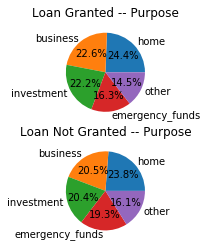

In [6]:
fig, axs = plt.subplots(2)
axs[0].pie(data_loan[data_loan.loan_granted==1]['loan_purpose'].value_counts(),\
        labels=data_loan[data_loan.loan_granted==1]['loan_purpose'].value_counts().index, autopct='%1.1f%%')
axs[0].set_title('Loan Granted -- Purpose')
axs[1].pie(data_loan[data_loan.loan_granted==0]['loan_purpose'].value_counts(),\
        labels=data_loan[data_loan.loan_granted==1]['loan_purpose'].value_counts().index, autopct='%1.1f%%')
axs[1].set_title('Loan Not Granted -- Purpose')

In [7]:
data_merged = pd.merge(data_loan, data_borrower, on='loan_id', how='left')

In [8]:
data_merged.shape

(101100, 16)

In [9]:
data_merged.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,19454,investment,2012-03-15,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,2012-01-17,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5
2,929493,other,2012-02-09,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4


In [10]:
train = data_merged[data_merged.loan_granted==1]
print(train.shape)
train.head()

(47654, 16)


,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
6,780070,business,2012-03-14,1,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,303138,emergency_funds,2012-08-31,1,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,91475,investment,2012-05-25,1,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [11]:
train[train.loan_id==172419].fully_repaid_previous_loans.isnull()

4    True
Name: fully_repaid_previous_loans, dtype: bool

In [12]:
train.loan_id.nunique()

47654

In [13]:
len(train[train.loan_repaid==0])/len(train[train.loan_repaid==1])

0.5519442454243471

In [14]:
df=train.groupby([pd.to_datetime(train.date).dt.month, 'loan_repaid']).loan_id.count().unstack()

In [15]:
df[0]/df[1]

date
1     0.546200
2     0.546906
3     0.544372
4     0.549980
5     0.579748
6     0.565800
7     0.540873
8     0.558531
9     0.559380
10    0.559867
11    0.539984
12    0.529882
dtype: float64

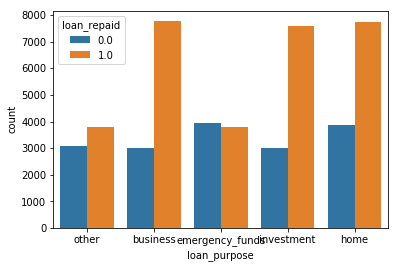

In [16]:
sns.countplot(x='loan_purpose', hue='loan_repaid', data=train)

Business, Investment, Home loans have a much higher probability of being repaid.
Do ctaegory-wise some loans have a higher probability of being repaid by yearly_salary or credit_limit_usage of borrower?

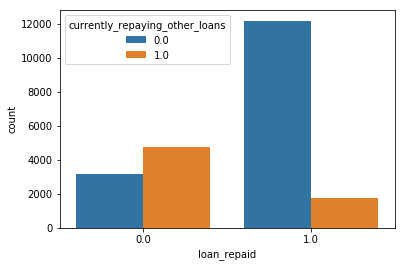

In [17]:
sns.countplot('loan_repaid', hue='currently_repaying_other_loans', data=train)

Much higher chance of repaying loans if not repaying other loans

/home/sirius/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/sirius/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


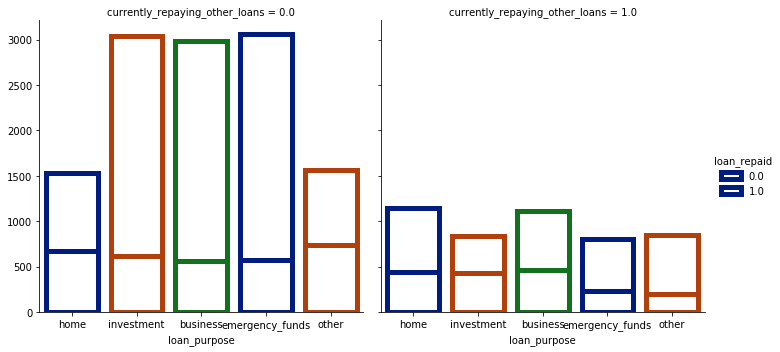

In [18]:
g = sns.FacetGrid(train, col="currently_repaying_other_loans",  hue="loan_repaid", size=5)
g = (g.map(sns.countplot, 'loan_purpose', facecolor=(0, 0, 0, 0), linewidth=5,edgecolor=sns.color_palette("dark", 3))).add_legend()

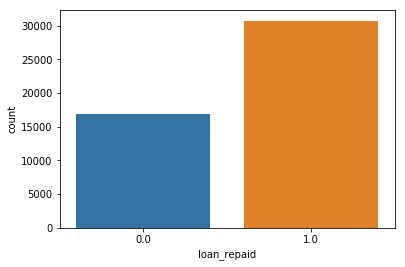

In [19]:
sns.countplot('loan_repaid', data=train)

In [20]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
train.columns

Index(['loan_id', 'loan_purpose', 'date', 'loan_granted', 'loan_repaid',
       'is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number'],
      dtype='object')

In [23]:
len(train[train.is_first_loan==1])+21865

47654

In [24]:
train[train.avg_percentage_credit_card_limit_used_last_year.isnull()]

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
116,769866,other,2012-12-13,1,0.0,0,1.0,1.0,0,NaN,1237,2793,1,35500,34,2
137,821752,business,2012-01-11,1,0.0,0,1.0,1.0,0,NaN,222,1259,1,43500,35,3
428,806042,investment,2012-07-23,1,0.0,1,NaN,NaN,0,NaN,868,1164,0,0,53,8
435,598750,business,2012-08-10,1,1.0,0,1.0,0.0,0,NaN,4032,4102,1,46900,44,2
477,132327,investment,2012-03-13,1,0.0,1,NaN,NaN,0,NaN,373,1022,0,0,37,0
490,361333,emergency_funds,2012-03-14,1,0.0,0,1.0,1.0,0,NaN,1706,1314,1,29100,33,4
750,542371,business,2012-10-19,1,0.0,1,NaN,NaN,0,NaN,1163,546,0,0,21,8
797,780943,home,2012-05-17,1,0.0,0,1.0,1.0,0,NaN,1131,2201,1,28900,58,8
1007,156118,other,2012-02-20,1,0.0,1,NaN,NaN,0,NaN,23,1852,1,23800,26,3
1026,399101,home,2012-09-26,1,0.0,1,NaN,NaN,0,NaN,739,4058,0,0,49,3


In [25]:
train.count().sort_values(ascending=True)

fully_repaid_previous_loans                        21865
currently_repaying_other_loans                     21865
avg_percentage_credit_card_limit_used_last_year    46751
loan_id                                            47654
loan_purpose                                       47654
date                                               47654
loan_granted                                       47654
loan_repaid                                        47654
is_first_loan                                      47654
total_credit_card_limit                            47654
saving_amount                                      47654
checking_amount                                    47654
is_employed                                        47654
yearly_salary                                      47654
age                                                47654
dependent_number                                   47654
dtype: int64

In [26]:
train[['fully_repaid_previous_loans', 'currently_repaying_other_loans']].head()

,fully_repaid_previous_loans,currently_repaying_other_loans
3,1.0,0.0
4,NaN,NaN
6,1.0,0.0
7,0.0,1.0
8,1.0,0.0


In [27]:
train.fully_repaid_previous_loans.fillna(1, inplace=True)
train.currently_repaying_other_loans.fillna(1, inplace=True)
train.avg_percentage_credit_card_limit_used_last_year.fillna(0, inplace=True)

/home/sirius/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [28]:
train.isna().sum()

loan_id                                            0
loan_purpose                                       0
date                                               0
loan_granted                                       0
loan_repaid                                        0
is_first_loan                                      0
fully_repaid_previous_loans                        0
currently_repaying_other_loans                     0
total_credit_card_limit                            0
avg_percentage_credit_card_limit_used_last_year    0
saving_amount                                      0
checking_amount                                    0
is_employed                                        0
yearly_salary                                      0
age                                                0
dependent_number                                   0
dtype: int64

In [29]:
X = train.drop(['loan_id','date','loan_granted', 'loan_repaid'], axis=1)
y = train.loan_repaid

In [30]:
X = pd.get_dummies(X, ['loan_purpose'], drop_first=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [34]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

KNeighborsClassifier
****Results****
Accuracy: 88.9417%
Log Loss: 1.5831726473927996


/home/sirius/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC
****Results****
Accuracy: 64.4821%
Log Loss: 0.6506343886694573
DecisionTreeClassifier
****Results****
Accuracy: 87.6687%
Log Loss: 4.259065732966884


/home/sirius/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 91.1310%
Log Loss: 0.47376130392223764
AdaBoostClassifier
****Results****
Accuracy: 91.7675%
Log Loss: 0.5334124477505046
GradientBoostingClassifier
****Results****
Accuracy: 92.1662%
Log Loss: 0.1904466862624817
GaussianNB
****Results****
Accuracy: 91.7745%
Log Loss: 0.1952535335144198
LinearDiscriminantAnalysis
****Results****
Accuracy: 89.6342%
Log Loss: 0.24177460672134607
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 88.9697%
Log Loss: 0.37392045050487155


In [35]:
log.sort_values('Accuracy', ascending=False)

,Classifier,Accuracy,Log Loss
0,GradientBoostingClassifier,92.166189,0.190447
0,GaussianNB,91.774498,0.195254
0,AdaBoostClassifier,91.767504,0.533412
0,RandomForestClassifier,91.131007,0.473761
0,LinearDiscriminantAnalysis,89.634189,0.241775
0,QuadraticDiscriminantAnalysis,88.969714,0.373920
0,KNeighborsClassifier,88.941736,1.583173
0,DecisionTreeClassifier,87.668742,4.259066
0,SVC,64.482059,0.650634


In [36]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10)

In [38]:
classifiers[2].n_features_

15

In [36]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(GaussianNB())
classifiers.append(QuadraticDiscriminantAnalysis())
classifiers.append(LinearSVC())



cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X, y = y, scoring = "accuracy", cv = kfold, n_jobs=4))
    print(classifier.__class__.__name__)

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,\
                       "Algorithm":["SVC","DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting",\
                                    "MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",\
                                    "NuSVC","GaussianNB","QuadraticDiscriminantAnalysis","LinearSVC"]})

SVC
DecisionTreeClassifier
AdaBoostClassifier
RandomForestClassifier
ExtraTreesClassifier
GradientBoostingClassifier


/home/sirius/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


MLPClassifier
KNeighborsClassifier
LogisticRegression
LinearDiscriminantAnalysis
NuSVC
GaussianNB
QuadraticDiscriminantAnalysis
LinearSVC


In [39]:
cv_res.sort_values('CrossValMeans', ascending=False)

,CrossValMeans,CrossValerrors,Algorithm
5,0.922273,0.004429,GradientBoosting
11,0.916502,0.003654,GaussianNB
3,0.913375,0.005101,RandomForest
4,0.905065,0.004967,ExtraTrees
9,0.898035,0.003822,LinearDiscriminantAnalysis
7,0.897595,0.005087,KNeighboors
12,0.891089,0.004607,QuadraticDiscriminantAnalysis
2,0.876631,0.004801,AdaBoost
1,0.876401,0.004230,DecisionTree
8,0.827443,0.006173,LogisticRegression


In [38]:
cv_results

[array([0.64435585, 0.64435585, 0.64435585, 0.64435585, 0.64456567,
        0.64435585, 0.64428122, 0.64428122, 0.64441646, 0.64462636]),
 array([0.88061267, 0.87977339, 0.87641628, 0.87054133, 0.8787243 ,
        0.87746538, 0.87093389, 0.8703043 , 0.8763644 , 0.88287154]),
 array([0.88690726, 0.87893412, 0.87620646, 0.87180025, 0.88145195,
        0.87725556, 0.87198321, 0.86967471, 0.87510495, 0.87699412]),
 array([0.9173311 , 0.91397398, 0.91607218, 0.90788922, 0.91859001,
        0.92068821, 0.90766002, 0.90703043, 0.91729639, 0.90722082]),
 array([0.90935795, 0.90956777, 0.90537138, 0.89739824, 0.91103651,
        0.91082669, 0.89926548, 0.90157398, 0.90680101, 0.89945424]),
 array([0.93033991, 0.92236676, 0.92131767, 0.91754091, 0.92761225,
        0.92803189, 0.91878279, 0.91899265, 0.91897565, 0.91876574]),
 array([0.87263953, 0.84263533, 0.80318926, 0.54175409, 0.81703735,
        0.81955518, 0.89066107, 0.84826863, 0.78736356, 0.70361041]),
 array([0.90201427, 0.8948804 , 0.

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'n_estimators':[10,50,100,150,200,250,300],
             'criterion':['gini','entropy'],
             "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10]
             }

In [41]:
rfc = RandomForestClassifier()

In [44]:
gsRFC = GridSearchCV(rfc,param_grid = param_grid, cv=kfold, scoring="precision", n_jobs= 4, verbose = 1)

In [45]:
gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

Fitting 10 folds for each of 378 candidates, totalling 3780 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.6s
/home/sirius/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/sirius/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/sirius/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memor

Using **Precision** as scoring metric as minimizing FPs over FNs more important

In [46]:
RFC_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=10, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,warm_start=False)

In [48]:
rf_best.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
accuracy_score(y_test, rf_best.predict(X_test))

0.9172553682590753

In [50]:
from sklearn.ensemble import VotingClassifier

In [51]:
vot_clf = VotingClassifier([('rf',rf_best),('gb',GaussianNB())])

In [52]:
vot_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)), ('gb', GaussianNB(priors=None, var_smoothing=1e-09))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [53]:
vot_clf.predict(X_test)

array([0., 0., 1., ..., 1., 0., 0.])

In [54]:
accuracy_score(y_test,vot_clf.predict(X_test))

0.9172553682590753

No improvement over best **RandomForest** classifier and still less accurate than **GradientBoosting**

In [55]:
classifiers[5]

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [56]:
len(X_train)

33357

In [57]:
gb_clf = GradientBoostingClassifier()

gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [2,3,4,5,6,7,8],
              'min_samples_leaf': [5,10,20,30,50,100], 
              }

In [58]:
gsGBC = GridSearchCV(gb_clf,param_grid = gb_param_grid, cv=kfold, scoring="precision", n_jobs= 4, verbose = 1)

In [59]:
gsGBC.fit(X_train,y_train)

Fitting 10 folds for each of 378 candidates, totalling 3780 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   28.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 23.7min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 74.5min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 89.4min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 139.0min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 169.1min
[Parallel(n_jobs=4)]: Done 3780 out of 3780 | elapsed: 231.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'loss': ['deviance'], 'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_samples_leaf': [5, 10, 20, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=1)

In [60]:
gsGBC.best_params_

{'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 7,
 'min_samples_leaf': 30,
 'n_estimators': 300}

In [61]:
gsGBC.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [62]:
gbs_best = GradientBoostingClassifier(criterion='friedman_mse', init=None,learning_rate=0.01, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None, subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [63]:
gbs_best.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [64]:
accuracy_score(y_test,gbs_best.predict(X_test))

0.9179548156956004

In [65]:
from sklearn.metrics import precision_score

In [66]:
rf_best_prec = precision_score(y_test,rf_best.predict(X_test))
vot_prec = precision_score(y_test,vot_clf.predict(X_test))
gbs_best_prec = precision_score(y_test,gbs_best.predict(X_test))

In [67]:
print(rf_best_prec, vot_prec, gbs_best_prec)

0.9437817539209189 0.9597254004576659 0.9463057466163746


**VotingClassifier** has improved the Precision over best **RandomForestClassifier** and is the best performing classifier so far